In [1]:
%matplotlib inline
import keras

from keras.layers         import Dense
from keras.models         import Model
from keras.models         import Sequential
from keras.utils.np_utils import to_categorical

from collections import Counter

import numpy             as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
max_iter = 50
seq_fn   = lambda z, c: z ** 2 + c

In [3]:
def iterate_sequence(seq_fn, max_iter, c):
    return 1 if c.real > 0 else 0

In [4]:
def iterate_sequence(seq_fn, max_iter, c):
    z = c
    for i in range(max_iter):
        z = seq_fn(z, c)
        if (z.real * z.real + z.imag * z.imag) > 4:
            return 1
    return 0

# Model results visualization

In [5]:
def generate_X(unit):
    c_list = []
    width  = 3 * unit
    height = 2 * unit
    
    for x in range(height):
        im = x * 2. / height - 1 
        for y in range(width):
            re = y * 3. / width - 2
            c_list.append(np.array([re, im]))
    
    return np.stack(c_list)

In [6]:
def generate_visualization(model, unit):
    width  = 3 * unit
    height = 2 * unit
    X      = generate_X(unit)
    y      = model.predict_classes(X, batch_size = 64)
    
    return y.reshape((2 * unit, 3 * unit))

In [7]:
class FakeModel():
    def predict_classes(self, X, **kwargs):
        return np.array([iterate_sequence(seq_fn, max_iter, complex(*sample)) for sample in X])

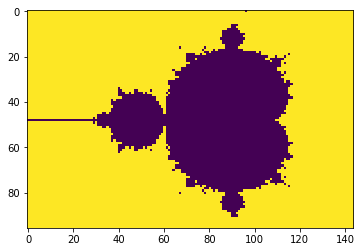

In [8]:
fake_model = FakeModel()
res        = generate_visualization(fake_model, 48)
plt.imshow(res)

# Training samples generation

In [9]:
nb_samples = 100000

In [10]:
samples       = np.random.rand(nb_samples, 2)
samples[:, 0] = samples[:, 0] * 3 - 2
samples[:, 1] = samples[:, 1] * 2 - 1

In [11]:
sample_img = np.array([iterate_sequence(seq_fn, max_iter, complex(*sample)) for sample in samples])

In [12]:
outside = samples[sample_img == 1]
inside  = samples[sample_img == 0][np.random.choice(samples.shape[0] - outside.shape[0], outside.shape[0])] 
X       = np.concatenate([inside, outside])
y       = np.concatenate([np.zeros(inside.shape[0]), np.zeros(outside.shape[0]) + 1]).astype(np.int32)
y       = to_categorical(y)

# Model definition

In [13]:
model = Sequential([
    Dense(512, input_dim = 2, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [14]:
model.compile('adam', 'binary_crossentropy')

In [17]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0641     

5504/6144 [=========================>....] - ETA: 0s

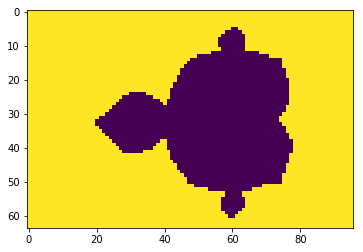

In [18]:
res = generate_visualization(model, 32)
plt.imshow(res)

In [19]:
model.optimizer.lr = 0.0001

In [20]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0590     

In [21]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0547     

5568/6144 [==========================>...] - ETA: 0s

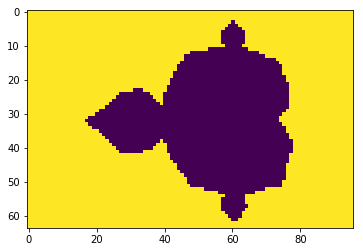

In [22]:
plt.imshow(generate_visualization(model, 32))

In [23]:
model.optimizer.lr = 1e-5

In [24]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0532     

In [25]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0512     

In [26]:
model.fit(X, y, nb_epoch = 3, batch_size = 256, shuffle = True)

Epoch 1/3
147044/147044 [==============================] - 4s - loss: 0.0495     

In [27]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0472     

In [28]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0453     

96832/98304 [============================>.] - ETA: 0s

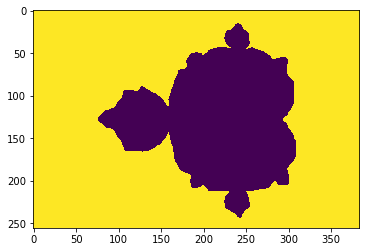

In [31]:
plt.imshow(generate_visualization(model, 128))

In [32]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0436     

In [33]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0419     

In [34]:
model.optimizer.lr = 1e-6

In [35]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0403     

392576/393216 [============================>.] - ETA: 0s 

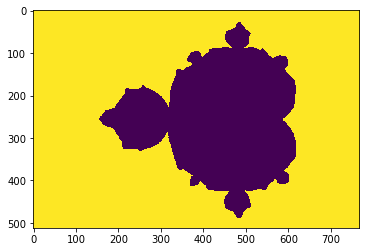

In [36]:
plt.imshow(generate_visualization(model, 256))

In [37]:
model.optimizer.lr = 1e-7

In [38]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0397     

In [39]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0384     

In [40]:
model.fit(X, y, nb_epoch = 6, batch_size = 256, shuffle = True)

Epoch 1/6
147044/147044 [==============================] - 4s - loss: 0.0383     

392768/393216 [============================>.] - ETA: 0s 

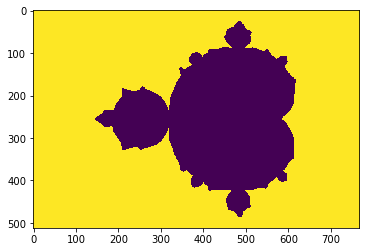

In [41]:
plt.imshow(generate_visualization(model, 256))